In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [41]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/medical_examination.csv',index_col=0)

In [42]:
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [43]:
df.shape

(70000, 12)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   sex          70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


The describe() method returns description of the data in the DataFrame.

If the DataFrame contains numerical data, the description contains these information for each column:

*   count - The number of not-empty values.
*   mean - The average (mean) value.
*   std - The standard deviation.
*   min - the minimum value.
*   25% - The 25% percentile*.
*   50% - The 50% percentile*.
*   75% - The 75% percentile*.
*   max - the maximum value.
*Percentile meaning: how many of the values are less than the given percentile.

In [45]:
df.describe()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
BMI = df['weight']/((df['height']/100)**2)
BMI = BMI > 25
df['overweight'] = BMI.astype(int)
df.head()


,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [47]:
# Normalize data by making 0 always good and 1 always bad.
#If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

df['cholesterol'] = df['cholesterol'].replace([1],0)
df['gluc'] = df['gluc'].replace([1],0)


In [48]:
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,3,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,3,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [49]:
df['cholesterol'] = df['cholesterol'].replace([2,3], value=1)
df['gluc'] = df['gluc'].replace([2,3], value=1)

In [50]:
df.cholesterol.value_counts()

,count
cholesterol,
0,52385
1,17615


In [51]:
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


The Categorical data:
<br>
Create a DataFrame with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.

In [52]:
var = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=var)
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


The Categorical Plot

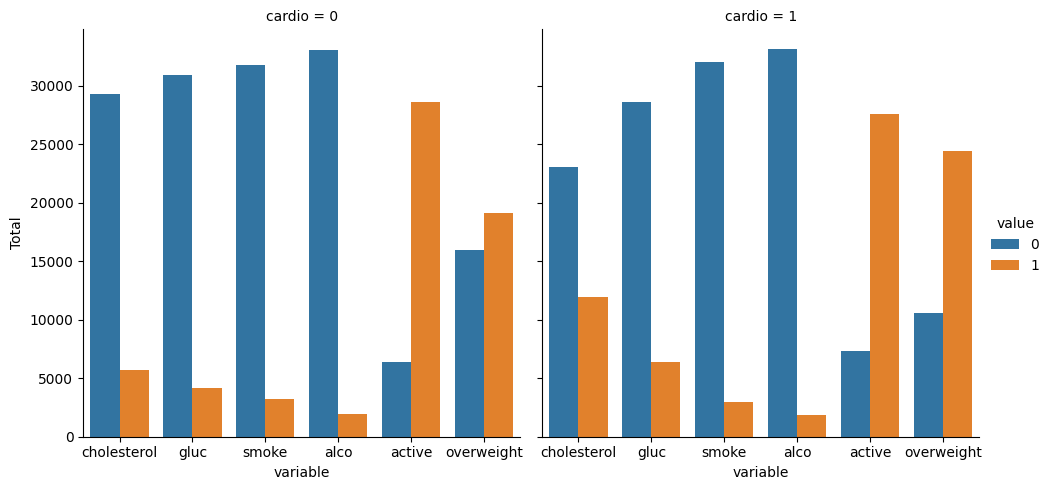

In [56]:
graph = sns.catplot(data=df_cat, kind="count",  x="variable", hue="value", col="cardio")
graph.set_ylabels('Total', fontsize=10)

In [57]:
df = df.loc[(df.ap_lo <= df.ap_hi)
                 & (df.height >= df.height.quantile(0.025))
                 & (df.height <= df.height.quantile(0.975))
                 & (df.weight >= df.weight.quantile(0.025))
                 & (df.weight <= df.weight.quantile(0.975)), :]

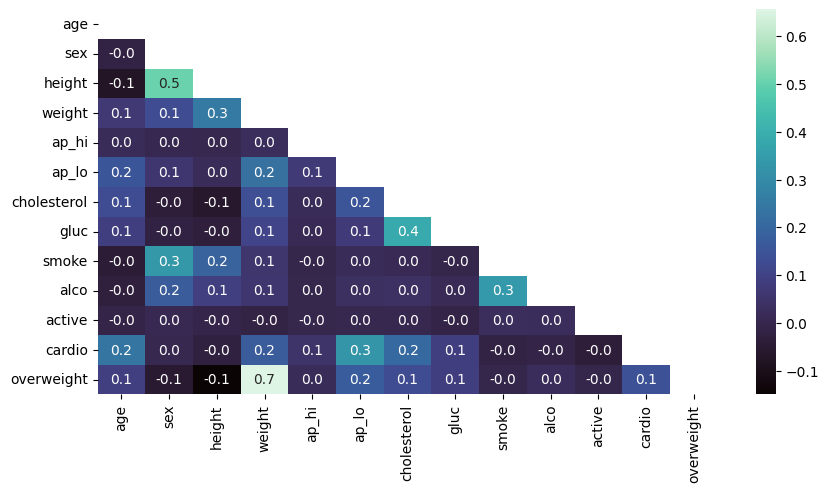

In [64]:
f, ax = plt.subplots(figsize=(10, 5))
corr = df.corr()
mask = np.triu(corr)
ax = sns.heatmap(corr, mask=mask, annot=True, cmap='mako', fmt=".1f")
plt.show()